#  Предобработка

In [1]:
import pandas as pd


file_path = r'C:\Users\BAZA PC\Desktop\datadegre.csv'

# Считываем CSV файл в DataFrame
data = pd.read_csv(file_path)

# Выводим первые 5 строк DataFrame
data

C:\Users\BAZA PC\AppData\Local\Temp\ipykernel_3032\1872612233.py:7: DtypeWarning: Columns (0,1,2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


#group   false false.1                  true                true.1  \
0       #datatype  string    long      dateTime:RFC3339      dateTime:RFC3339   
1        #default    mean     NaN                   NaN                   NaN   
2             NaN  result   table                _start                 _stop   
3             NaN     NaN       0  2022-09-17T22:50:00Z  2023-02-18T01:45:00Z   
4             NaN     NaN       0  2022-09-17T22:50:00Z  2023-02-18T01:45:00Z   
...           ...     ...     ...                   ...                   ...   
592021        NaN     NaN       2  2022-09-17T22:50:00Z  2023-02-18T01:45:00Z   
592022        NaN     NaN       2  2022-09-17T22:50:00Z  2023-02-18T01:45:00Z   
592023        NaN     NaN       2  2022-09-17T22:50:00Z  2023-02-18T01:45:00Z   
592024        NaN     NaN       2  2022-09-17T22:50:00Z  2023-02-18T01:45:00Z   
592025        NaN     NaN       2  2022-09-17T22:50:00Z  2023-02-18T01:45:00Z   

                     false.2 false.3  true.2  \
0           dateTime:RFC3339  double  string   
1                        NaN     NaN     NaN   
2                      _time  _value  _field   
3       2022-09-17T22:51:00Z      31   value   
4       2022-09-17T22:56:00Z      31   value   
...                      ...     ...     ...   
592021  2023-02-18T01:41:00Z      28   value   
592022  2023-02-18T01:42:00Z      28   value   
592023  2023-02-18T01:43:00Z      28   value   
592024  2023-02-18T01:44:00Z      28   value   
592025  2023-02-18T01:45:00Z      28   value   

                                  true.3       true.4         true.5  \
0                                 string       string         string   
1                                    NaN          NaN            NaN   
2                           _measurement     hostname         metric   
3       check_tier-2_cooling_system_temp  apc-cu-a111  bottom_sensor   
4       check_tier-2_cooling_system_temp  apc-cu-a111  bottom_sensor   
...                                  ...          ...            ...   
592021  check_tier-2_cooling_system_temp  apc-cu-a111     top_sensor   
592022  check_tier-2_cooling_system_temp  apc-cu-a111     top_sensor   
592023  check_tier-2_cooling_system_temp  apc-cu-a111     top_sensor   
592024  check_tier-2_cooling_system_temp  apc-cu-a111     top_sensor   
592025  check_tier-2_cooling_system_temp  apc-cu-a111     top_sensor   

                                         true.6  
0                                        string  
1                                           NaN  
2                                       service  
3       CHECK_TIER-2_COOLING_SYSTEM_TEMPERATURE  
4       CHECK_TIER-2_COOLING_SYSTEM_TEMPERATURE  
...                                         ...  
592021  CHECK_TIER-2_COOLING_SYSTEM_TEMPERATURE  
592022  CHECK_TIER-2_COOLING_SYSTEM_TEMPERATURE  
592023  CHECK_TIER-2_COOLING_SYSTEM_TEMPERATURE  
592024  CHECK_TIER-2_COOLING_SYSTEM_TEMPERATURE  
592025  CHECK_TIER-2_COOLING_SYSTEM_TEMPERATURE  

[592026 rows x 12 columns]

In [2]:
# Создаем новый DataFrame, выбирая нужные колонки и переименовывая их
new_data = data[['false.2', 'false.3', 'true.5']].rename(columns={
    'false.2': 'time',
    'false.3': 'value',
    'true.5': 'type'
})

# Удаляем первые 3 строки
new_data = new_data.iloc[3:]

# Выводим первые 5 строк нового DataFrame
new_data.describe()

time   value           type
count                 592023  592023         592023
unique                197341     278              3
top     2023-02-18T01:45:00Z      30  bottom_sensor
freq                       3  113015         197341

In [3]:
# Разделяем DataFrame на три отдельных датасета по уникальным значениям в колонке 'type'
datasets = {value: group for value, group in new_data.groupby('type')}

# Теперь у вас есть три датасета, доступные по ключам
dataset1 = datasets['bottom_sensor'] 
dataset2 = datasets['middle_sensor'] 
dataset3 = datasets['top_sensor']  

# Выводим размеры полученных датасетов
print(f"Dataset 1 size: {dataset1.shape}")
print(f"Dataset 2 size: {dataset2.shape}")
print(f"Dataset 3 size: {dataset3.shape}")
dataset1

Dataset 1 size: (197341, 3)
Dataset 2 size: (197341, 3)
Dataset 3 size: (197341, 3)


time value           type
3       2022-09-17T22:51:00Z    31  bottom_sensor
4       2022-09-17T22:56:00Z    31  bottom_sensor
5       2022-09-17T23:01:00Z    31  bottom_sensor
6       2022-09-17T23:06:00Z    31  bottom_sensor
7       2022-09-17T23:11:00Z    31  bottom_sensor
...                      ...   ...            ...
197339  2023-02-18T01:41:00Z  28.0  bottom_sensor
197340  2023-02-18T01:42:00Z  28.0  bottom_sensor
197341  2023-02-18T01:43:00Z  28.0  bottom_sensor
197342  2023-02-18T01:44:00Z  28.0  bottom_sensor
197343  2023-02-18T01:45:00Z  28.0  bottom_sensor

[197341 rows x 3 columns]

In [4]:
# Преобразуем колонку 'time' в формат datetime
dataset1['time'] = pd.to_datetime(dataset1['time'])

# Устанавливаем 'time' в качестве индекса
dataset1.set_index('time', inplace=True)

# Ресемплируем данные с шагом в 1 минуту и заполняем пропуски
resampled_data1 = dataset1.resample('1T').ffill()

# Если вы хотите, чтобы значения повторялись, а не заполнялись, используйте:
# resampled_data = new_data.resample('1T').pad()

# Сбрасываем индекс, если нужно
resampled_data1.reset_index(inplace=True)

# Выводим первые 5 строк нового DataFrame
print(resampled_data1.head())

                       time value           type
0 2022-09-17 22:51:00+00:00    31  bottom_sensor
1 2022-09-17 22:52:00+00:00    31  bottom_sensor
2 2022-09-17 22:53:00+00:00    31  bottom_sensor
3 2022-09-17 22:54:00+00:00    31  bottom_sensor
4 2022-09-17 22:55:00+00:00    31  bottom_sensor


C:\Users\BAZA PC\AppData\Local\Temp\ipykernel_3032\952247293.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data1 = dataset1.resample('1T').ffill()


In [5]:
# Преобразуем колонку 'time' в формат datetime
dataset2['time'] = pd.to_datetime(dataset2['time'])

# Устанавливаем 'time' в качестве индекса
dataset2.set_index('time', inplace=True)

# Ресемплируем данные с шагом в 1 минуту и заполняем пропуски
resampled_data2 = dataset2.resample('1T').ffill()

# Если вы хотите, чтобы значения повторялись, а не заполнялись, используйте:
# resampled_data = new_data.resample('1T').pad()

# Сбрасываем индекс, если нужно
resampled_data2.reset_index(inplace=True)

# Выводим первые 5 строк нового DataFrame
print(resampled_data2.head())

                       time value           type
0 2022-09-17 22:51:00+00:00  29.0  middle_sensor
1 2022-09-17 22:52:00+00:00  29.0  middle_sensor
2 2022-09-17 22:53:00+00:00  29.0  middle_sensor
3 2022-09-17 22:54:00+00:00  29.0  middle_sensor
4 2022-09-17 22:55:00+00:00  29.0  middle_sensor


C:\Users\BAZA PC\AppData\Local\Temp\ipykernel_3032\3952135701.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data2 = dataset2.resample('1T').ffill()


In [6]:
# Преобразуем колонку 'time' в формат datetime
dataset3['time'] = pd.to_datetime(dataset3['time'])

# Устанавливаем 'time' в качестве индекса
dataset3.set_index('time', inplace=True)

# Ресемплируем данные с шагом в 1 минуту и заполняем пропуски
resampled_data3 = dataset3.resample('1T').ffill()

# Если вы хотите, чтобы значения повторялись, а не заполнялись, используйте:
# resampled_data = new_data.resample('1T').pad()

# Сбрасываем индекс, если нужно
resampled_data3.reset_index(inplace=True)

# Выводим первые 5 строк нового DataFrame
print(resampled_data3.head())


                       time value        type
0 2022-09-17 22:51:00+00:00  31.0  top_sensor
1 2022-09-17 22:52:00+00:00  31.0  top_sensor
2 2022-09-17 22:53:00+00:00  31.0  top_sensor
3 2022-09-17 22:54:00+00:00  31.0  top_sensor
4 2022-09-17 22:55:00+00:00  31.0  top_sensor


C:\Users\BAZA PC\AppData\Local\Temp\ipykernel_3032\1610405134.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_data3 = dataset3.resample('1T').ffill()


# Итоговый тип данных для одного из трех сенсоров

In [7]:
resampled_data3['value'] = pd.to_numeric(resampled_data3['value'], errors='coerce')
resampled_data2['value'] = pd.to_numeric(resampled_data2['value'], errors='coerce')
resampled_data1['value'] = pd.to_numeric(resampled_data1['value'], errors='coerce')
resampled_data3['value'].mean()

np.float64(30.718874237511052)

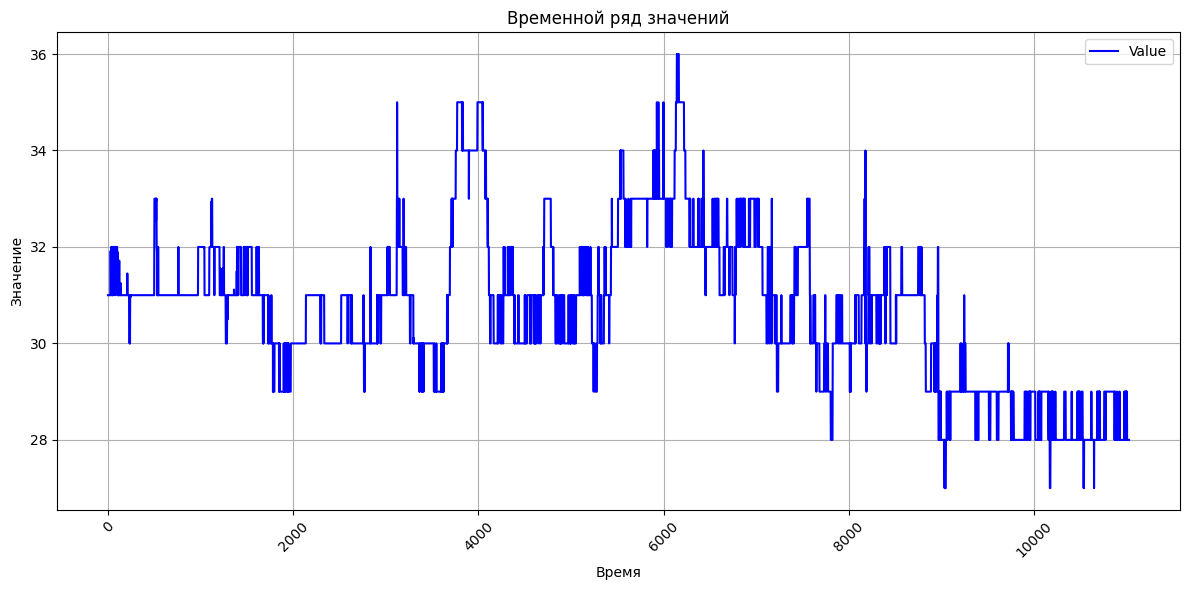

In [8]:
import matplotlib.pyplot as plt

# Убедитесь, что вы сбросили индексы в resampled_data4
resampled_data4 = resampled_data3.iloc[::20].reset_index(drop=True)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(resampled_data4.index, resampled_data4['value'], label='Value', color='blue')
plt.title('Временной ряд значений')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np



# Параметры
tolerance = 0.5  # Допустимое отклонение
top_n = 10  # Количество самых длинных последовательностей

# Переменные для хранения результатов
sequences = []
current_sequence = []
start_index = 0

# Итерация по данным
for i, value in enumerate(resampled_data3['value']):
    if not current_sequence:
        # Начало новой последовательности
        current_sequence.append(value)
        start_index = i
    else:
        # Проверяем, попадает ли текущее значение в диапазон
        if abs(value - current_sequence[0]) <= tolerance:
            current_sequence.append(value)
        else:
            # Сохраняем текущую последовательность
            sequences.append({
                'start_index': start_index,
                'end_index': i - 1,
                'length': len(current_sequence),
                'values': current_sequence
            })
            # Начинаем новую последовательность
            current_sequence = [value]
            start_index = i

# Добавляем последнюю последовательность, если она есть
if current_sequence:
    sequences.append({
        'start_index': start_index,
        'end_index': len(resampled_data4) - 1,
        'length': len(current_sequence),
        'values': current_sequence
    })

# Сортировка последовательностей по длине
sorted_sequences = sorted(sequences, key=lambda x: x['length'], reverse=True)

# Выбор топ-10 самых длинных последовательностей
top_sequences = sorted_sequences[:top_n]

# Вывод результатов
for seq in top_sequences:
    print(f"Start Index: {seq['start_index']}, End Index: {seq['end_index']}, Length: {seq['length']}")
    print(f"Values: {seq['values']}")
    print("-" * 40)

Start Index: 4810, End Index: 9984, Length: 5175
Values: [31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.95, 30.95, 30.95, 30.95, 30.95, 31.0, 31.0, 31.0, 31.0, 31.0, 30.85, 30.85, 30.85, 30.85, 30.85, 30.83333333333333, 30.83333333333333, 30.83333333333333, 30.83333333333333, 30.83333333333333, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.

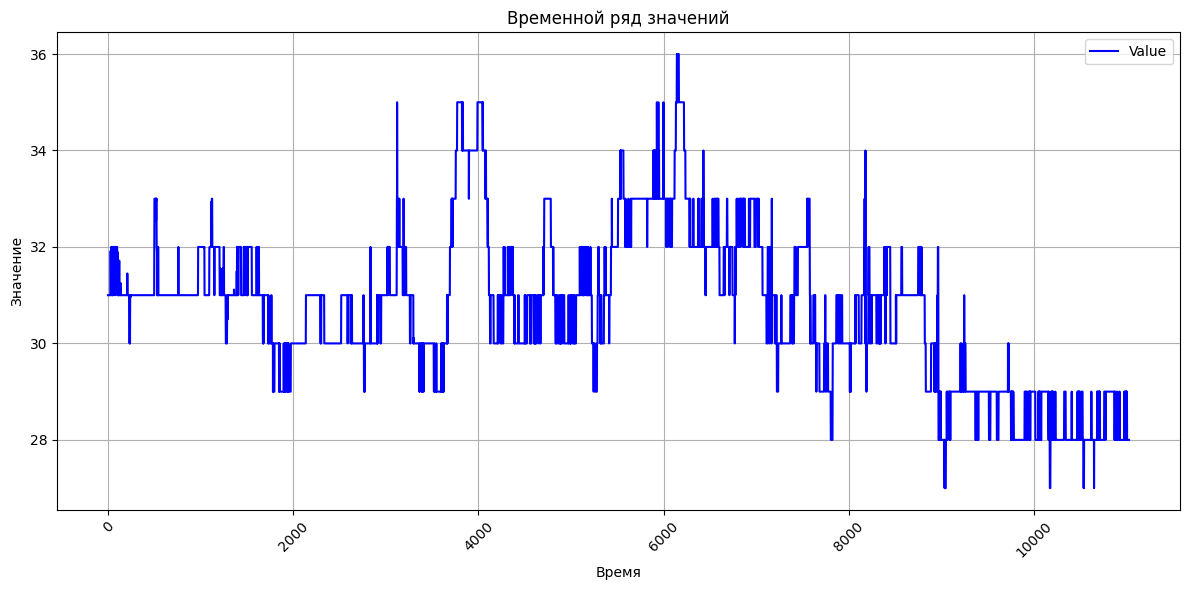

In [10]:
import matplotlib.pyplot as plt# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(resampled_data4.index, resampled_data4['value'], label='Value', color='blue')
plt.title('Временной ряд значений')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

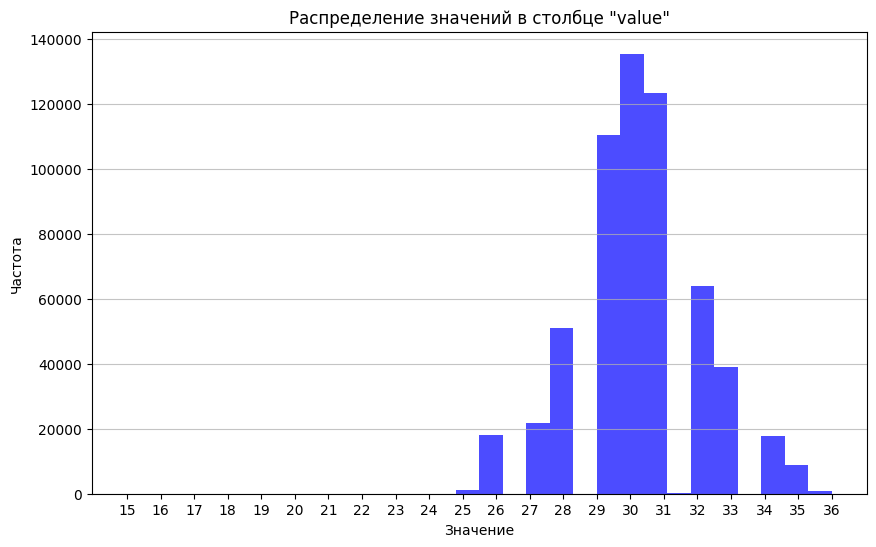

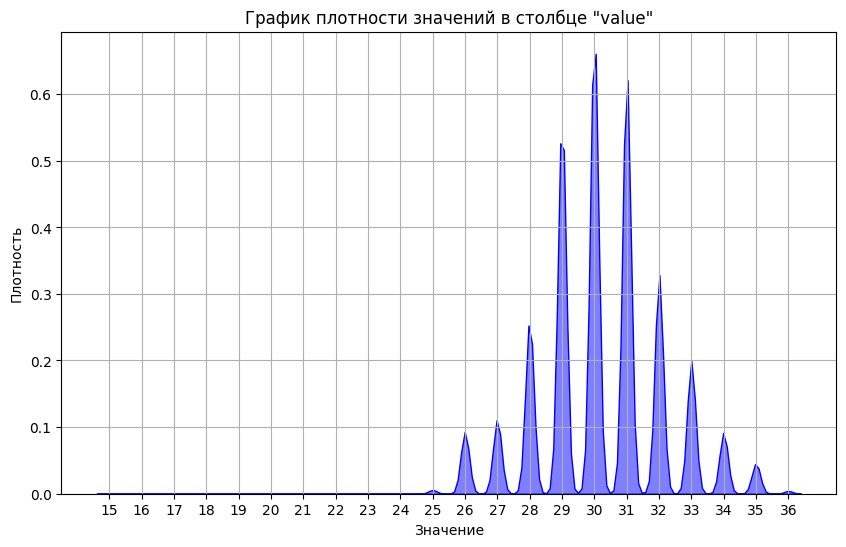

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем столбец 'value' в числовой формат
new_data['value'] = pd.to_numeric(new_data['value'], errors='coerce')

# Построение гистограммы для столбца 'value'
plt.figure(figsize=(10, 6))
plt.hist(new_data['value'], bins=30, color='blue', alpha=0.7)
plt.title('Распределение значений в столбце "value"')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)

# Установка меток на оси X через 1
plt.xticks(np.arange(new_data['value'].min(), new_data['value'].max() + 1, 1))
plt.show()

# Построение графика плотности для столбца 'value'
plt.figure(figsize=(10, 6))
sns.kdeplot(new_data['value'], color='blue', fill=True, alpha=0.5)
plt.title('График плотности значений в столбце "value"')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.grid()

# Установка меток на оси X через 1
plt.xticks(np.arange(new_data['value'].min(), new_data['value'].max() + 1, 1))
plt.show()

# RNN проба

In [15]:
# Оставляем только столбец 'value' (временной ряд)
values = resampled_data3['value'].values.reshape(-1, 1)

# Нормализация данных (приводим значения к диапазону [0, 1])
scaler = MinMaxScaler()
values_normalized = scaler.fit_transform(values)

# Преобразуем данные в тензоры PyTorch
values_tensor = torch.FloatTensor(values_normalized)

# Функция для создания последовательностей
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return torch.stack(xs), torch.stack(ys)

# Длина последовательности (например, 10 временных шагов)
seq_length = 10
X, y = create_sequences(values_tensor, seq_length)

# Разделение на обучающую и тестовую выборки
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Создание DataLoader для удобства
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        # RNN слой
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        # Полносвязный слой для вывода
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Инициализация скрытого состояния
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        # Проход через RNN
        out, _ = self.rnn(x, h0)
        # Берем последний выход RNN
        out = self.fc(out[:, -1, :])
        return out

# Параметры модели
input_size = 1  # Один признак (value)
hidden_size = 64  # Размер скрытого состояния
output_size = 1  # Предсказываем одно значение

# Инициализация модели
model = SimpleRNN(input_size, hidden_size, output_size)

# Перемещение модели на GPU, если доступно
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Функция потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Количество эпох
num_epochs = 20

# Список для хранения потерь на каждой эпохе
train_losses = []

# Обучение
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0  # Суммарные потери за эпоху
    for batch_X, batch_y in train_loader:
        # Перемещение данных на GPU
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        # Обнуление градиентов
        optimizer.zero_grad()
        
        # Прямой проход
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Обратный проход и оптимизация
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()  # Добавляем потери за батч
    
    # Вычисляем средние потери за эпоху
    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)  # Сохраняем для графика
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# График сходимости ошибки
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

import time

with torch.no_grad():
    # Перемещение тестовых данных на GPU
    X_test, y_test = X_test.to(device), y_test.to(device)
    
    # Начало отсчета времени
    start_time = time.time()
    
    # Предсказание
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    
    # Обратная нормализация для получения реальных значений
    test_outputs = scaler.inverse_transform(test_outputs.cpu().numpy())
    y_test_real = scaler.inverse_transform(y_test.cpu().numpy())
    
    # Конец отсчета времени
    end_time = time.time()
    
    # Вычисление времени выполнения
    elapsed_time = end_time - start_time
    
    print(f'Test Loss: {test_loss.item():.4f}')
    print(f'Time taken for testing: {elapsed_time:.4f} seconds')
    
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_real, label='Real Values')
plt.plot(test_outputs, label='Predicted Values')
plt.legend()
plt.show()

AttributeError: partially initialized module 'torch._dynamo' has no attribute 'external_utils' (most likely due to a circular import)

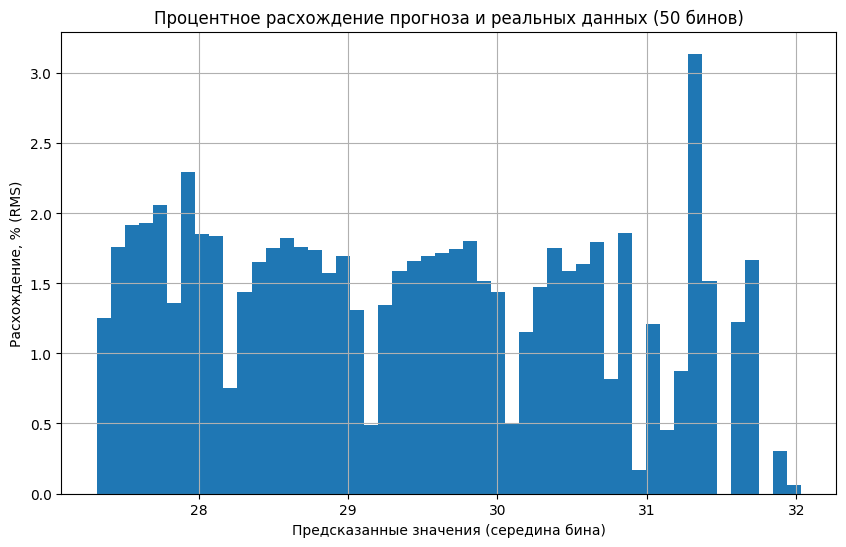

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Преобразуем предсказанные и реальные значения в массивы NumPy
predicted_values = test_outputs.flatten()
real_values = y_test_real.flatten()

# Разбиение на 50 бинов (интервалов)
num_bins = 50
bins = np.linspace(min(predicted_values), max(predicted_values), num_bins + 1)  # Границы бинов
bin_centers = (bins[:-1] + bins[1:]) / 2  # Середины бинов

# Вычисление процентного расхождения
percentage_rms = []

for i in range(num_bins):
    # Выбираем значения, попавшие в текущий бин
    mask = (predicted_values >= bins[i]) & (predicted_values < bins[i + 1])
    predicted_bin = predicted_values[mask]
    real_bin = real_values[mask]

    # Если в бине есть данные, вычисляем RMS и процентное расхождение
    if len(predicted_bin) > 0:
        rms = np.sqrt(np.mean((predicted_bin - real_bin) ** 2))  # RMS
        mean_real = np.mean(real_bin)  # Среднее реальное значение в бине
        percentage_rms.append((rms / mean_real) * 100)  # Процентное расхождение
    else:
        percentage_rms.append(np.nan)  # Если данных нет, добавляем NaN

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, percentage_rms, width=np.diff(bins)[0], align='center')
plt.xlabel('Предсказанные значения (середина бина)')
plt.ylabel('Расхождение, % (RMS)')
plt.title('Процентное расхождение прогноза и реальных данных (50 бинов)')
plt.grid(True)
plt.show()

# LSTM Проба

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import time

# Загрузка и нормализация данных
values = resampled_data3['value'].values.reshape(-1, 1)
scaler = MinMaxScaler()
values_normalized = scaler.fit_transform(values)

# Преобразуем данные в тензоры PyTorch
values_tensor = torch.FloatTensor(values_normalized)

# Функция для создания последовательностей для Multi-Output Forecasting
def create_sequences_multi_output(data, seq_length, output_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length - output_length + 1):
        x = data[i:i + seq_length]
        y = data[i + seq_length:i + seq_length + output_length]
        xs.append(x)
        ys.append(y)
    return torch.stack(xs), torch.stack(ys)

# Длина последовательности и количество предсказываемых значений
seq_length = 10
output_length = 5  # Предсказываем 5 значений вперёд
X, y = create_sequences_multi_output(values_tensor, seq_length, output_length)

# Разделение на обучающую и тестовую выборки
train_size = int(len(X) * 0.95)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Создание DataLoader для удобства
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Определение модели LSTM для Multi-Output Forecasting
class LSTMModelMultiOutput(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModelMultiOutput, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = nn.Dropout(0.2)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Параметры модели
input_size = 1  # Один признак (value)
hidden_size = 64  # Размер скрытого состояния
output_size = output_length  # Предсказываем 5 значений
num_layers = 1  # Количество слоев LSTM

# Инициализация модели
model = LSTMModelMultiOutput(input_size, hidden_size, output_size, num_layers)

# Перемещение модели на GPU, если доступно
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 50
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# График сходимости ошибки
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Тестирование модели
model.eval()
with torch.no_grad():
    X_test, y_test = X_test .to(device), y_test.to(device)
    test_outputs_multi_step = model(X_test)

    # Обратная нормализация для получения реальных значений
    test_outputs_multi_step = scaler.inverse_transform(test_outputs_multi_step.cpu().numpy())
    y_test_real = scaler.inverse_transform(y_test.cpu().numpy())

# Вывод результатов
print(f'Multi-step-ahead Test Predictions: {test_outputs_multi_step}')
print(f'Real Values: {y_test_real}')

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(y_test_real, label='Real Values', color='blue')
for i in range(output_length):
    plt.plot(test_outputs_multi_step[:, i], label=f'Multi-step-ahead Prediction {i+1}', linestyle='--')
plt.title('Multi-step-ahead Predictions vs Real Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Прямое предсказание (Direct Forecasting)
model.eval()
with torch.no_grad():
    current_input = X_test[0].unsqueeze(0)  # Начальное значение
    direct_predictions = []

    for _ in range(output_length):
        next_pred = model(current_input)
        direct_predictions.append(next_pred.item())
        current_input = torch.cat((current_input[:, 1:, :], next_pred.view(1, 1, 1)), dim=1)

# Обратная нормализация для получения реальных значений
direct_predictions = scaler.inverse_transform(np.array(direct_predictions).reshape(-1, 1))

# Вывод результатов
print(f'Direct Forecasting Predictions: {direct_predictions}')

# Визуализация результатов прямого предсказания
plt.figure(figsize=(12, 6))
plt.plot(y_test_real[:output_length], label='Real Values', color='blue')
plt.plot(direct_predictions, label='Direct Forecasting Predictions', color='orange', linestyle='--')
plt.title('Direct Forecasting Predictions vs Real Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

D:\PyTorchEnv\.venv\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32, 5, 1])) that is different to the input size (torch.Size([32, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (32) must match the size of tensor b (5) at non-singleton dimension 1

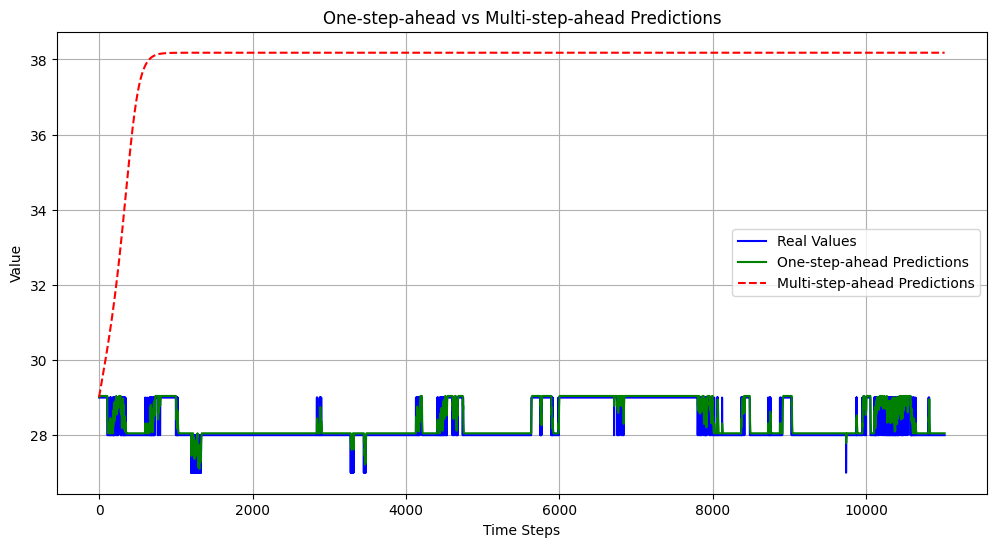

In [13]:
# 7. Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(y_test_real, label='Real Values', color='blue')
plt.plot(test_outputs_one_step, label='One-step-ahead Predictions', color='green')
plt.plot(multi_step_predictions, label='Multi-step-ahead Predictions', color='red', linestyle='--')
plt.title('One-step-ahead vs Multi-step-ahead Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Преобразуем предсказанные и реальные значения в массивы NumPy
predicted_values = test_outputs.flatten()
real_values = y_test_real.flatten()

# Разбиение на 50 бинов (интервалов)
num_bins = 50
bins = np.linspace(min(predicted_values), max(predicted_values), num_bins + 1)  # Границы бинов
bin_centers = (bins[:-1] + bins[1:]) / 2  # Середины бинов

# Вычисление процентного расхождения
percentage_rms = []

for i in range(num_bins):
    # Выбираем значения, попавшие в текущий бин
    mask = (predicted_values >= bins[i]) & (predicted_values < bins[i + 1])
    predicted_bin = predicted_values[mask]
    real_bin = real_values[mask]

    # Если в бине есть данные, вычисляем RMS и процентное расхождение
    if len(predicted_bin) > 0:
        rms = np.sqrt(np.mean((predicted_bin - real_bin) ** 2))  # RMS
        mean_real = np.mean(real_bin)  # Среднее реальное значение в бине
        percentage_rms.append((rms / mean_real) * 100)  # Процентное расхождение
    else:
        percentage_rms.append(np.nan)  # Если данных нет, добавляем NaN

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, percentage_rms, width=np.diff(bins)[0], align='center')
plt.xlabel('Предсказанные значения (середина бина)')
plt.ylabel('Расхождение, % (RMS)')
plt.title('Процентное расхождение прогноза и реальных данных (50 бинов)')
plt.grid(True)
plt.show()

IndexError: boolean index did not match indexed array along axis 0; size of axis is 11025 but size of corresponding boolean axis is 44097

# MLP проба

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Пример данных (замените на ваши данные)
values = resampled_data3['value'].values  # Замените на resampled_data3['value'].values

# Преобразуем в одномерный массив
values = values.flatten()  # Теперь это будет (240000,)

# Подготовка данных
n = 10  # Длина входной последовательности
data = []
target = []

# Формируем входные данные и целевые значения
for i in range(len(values) - n):
    data.append(values[i:i + n])
    target.append(values[i + n])

data = np.array(data)  # Размер (число примеров, n)
target = np.array(target)  # Размер (число примеров,)

# Разделение на обучающую и тестовую выборки
train_size = int(len(data) * 0.8)
X_train, X_test = data[:train_size], data[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

# Преобразование в тензоры
X_train_tensor = torch.FloatTensor(X_train)  # Размер (число примеров, n)
y_train_tensor = torch.FloatTensor(y_train)  # Размер (число примеров,)
X_test_tensor = torch.FloatTensor(X_test)  # Размер (число примеров, n)
y_test_tensor = torch.FloatTensor(y_test)  # Размер (число примеров,)

# Определение модели (перцептрон с двумя скрытыми слоями)
class SimplePerceptron(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(SimplePerceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)  # Первый скрытый слой
        self.relu1 = nn.ReLU()  # Активационная функция ReLU для первого слоя
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # Второй скрытый слой
        self.relu2 = nn.ReLU()  # Активационная функция ReLU для второго слоя
        self.fc3 = nn.Linear(hidden_size2, 1)  # Выходной слой

    def forward(self, x):
        x = self.fc1(x)  # Прямой проход через первый скрытый слой
        x = self.relu1(x)  # Применение активации для первого слоя
        x = self.fc2(x)  # Прямой проход через второй скрытый слой
        x = self.relu2(x)  # Применение активации для второго слоя
        return self.fc3(x)  # Прямой проход через выходной слой

# Параметры
input_size = n  # Длина входной последовательности
hidden_size1 = 32  # Размер первого скрытого слоя
hidden_size2 = 32  # Размер второго скрытого слоя
num_epochs = 1000  # Количество эпох
learning_rate = 0.0001

# Инициализация модели, функции потерь и оптимизатора
model = SimplePerceptron(input_size, hidden_size1, hidden_size2)

# Перемещение модели на GPU, если доступно
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Перемещение данных на GPU
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

# Список для хранения значений потерь
train_losses = []

# Обучение модели
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Прямой проход
    outputs = model(X_train_tensor)  # Убедитесь, что X_train_tensor имеет форму (число примеров, n)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    
    # Обратный проход и оптимизация
    loss.backward()
    optimizer.step()
    
    # Сохраняем потери для графика
    train_losses.append(loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

import time

model.eval()
with torch.no_grad():
    # Перемещение тестовых данных на GPU
    X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)
    
    # One-step-ahead предсказание
    start_time_one_step = time.time()
    test_outputs_one_step = model3(X_test_tensor)
    test_loss_one_step = criterion(test_outputs_one_step.squeeze(), y_test_tensor)
    end_time_one_step = time.time()
    elapsed_time_one_step = end_time_one_step - start_time_one_step
    
    # Вывод результатов
    print(f'One-step-ahead Test Loss: {test_loss_one_step.item():.4f}')
    print(f'Time taken for One-step-ahead prediction: {elapsed_time_one_step:.4f} seconds')


model.eval()
with torch.no_grad():
    # Multi-step-ahead предсказание
    start_time_multi_step = time.time()
    multi_step_predictions = []
    current_input = X_test_tensor[0].unsqueeze(0)  # Размер: (1, n)
    
    for i in range(len(X_test_tensor)):
        # Предсказание следующего значения
        next_pred = model(current_input)
        multi_step_predictions.append(next_pred.item())
        
        # Обновляем входные данные
        if i < len(X_test_tensor) - 1:
            # Правильное формирование нового значения
            new_value = next_pred.view(1, -1)  # Размер: (1, 1)
            
            # Объединяем тензоры с одинаковой размерностью
            current_input = torch.cat(
                (current_input[:, 1:],  # Размер: (1, n-1)
                 new_value),           # Размер: (1, 1)
                dim=1
            )
    
    # Преобразуем предсказания в массив NumPy
    multi_step_predictions = np.array(multi_step_predictions)
    
    # Вычисляем потери для Multi-step-ahead
    test_loss_multi_step = criterion(torch.FloatTensor(multi_step_predictions).to(device), y_test_tensor)
    end_time_multi_step = time.time()
    elapsed_time_multi_step = end_time_multi_step - start_time_multi_step
    
    # Вывод результатов
    print(f'Multi-step-ahead Test Loss: {test_loss_multi_step.item():.4f}')
    print(f'Time taken for Multi-step-ahead prediction: {elapsed_time_multi_step:.4f} seconds')

Epoch [10/1000], Loss: 893.3950
Epoch [20/1000], Loss: 859.1899
Epoch [30/1000], Loss: 825.7285
Epoch [40/1000], Loss: 794.4977
Epoch [50/1000], Loss: 764.2359
Epoch [60/1000], Loss: 732.7839
Epoch [70/1000], Loss: 699.2567
Epoch [80/1000], Loss: 664.7253
Epoch [90/1000], Loss: 627.6337
Epoch [100/1000], Loss: 593.2446
Epoch [110/1000], Loss: 561.6362
Epoch [120/1000], Loss: 527.7781
Epoch [130/1000], Loss: 493.4019
Epoch [140/1000], Loss: 459.3024
Epoch [150/1000], Loss: 425.6706
Epoch [160/1000], Loss: 392.5731
Epoch [170/1000], Loss: 356.1144
Epoch [180/1000], Loss: 319.7185
Epoch [190/1000], Loss: 284.8432
Epoch [200/1000], Loss: 251.8376
Epoch [210/1000], Loss: 220.8524
Epoch [220/1000], Loss: 191.9910
Epoch [230/1000], Loss: 165.3377
Epoch [240/1000], Loss: 140.9579
Epoch [250/1000], Loss: 118.8920
Epoch [260/1000], Loss: 99.1489
Epoch [270/1000], Loss: 81.9225
Epoch [280/1000], Loss: 66.9295
Epoch [290/1000], Loss: 53.9949
Epoch [300/1000], Loss: 42.9904
Epoch [310/1000], Loss: 

NameError: name 'model3' is not defined

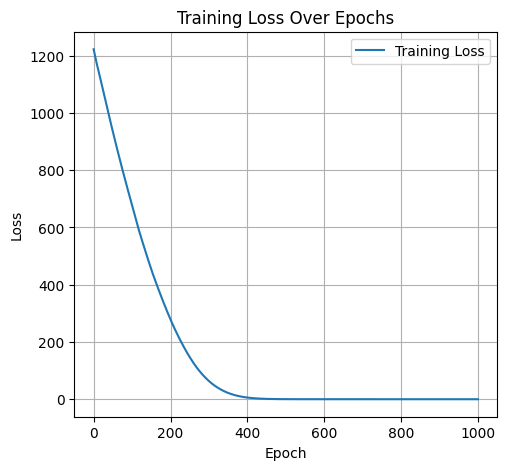

In [33]:
# Построение графиков
# 1. График сходимости ошибки
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)

In [38]:
# Перемещение данных обратно на CPU для визуализации

test_outputs_one_step = test_outputs_one_step.cpu().numpy()  # Перемещаем на CPU и преобразуем в NumPy
multi_step_predictions = multi_step_predictions.cpu().numpy()  # Перемещаем на CPU и преобразуем в NumPy

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

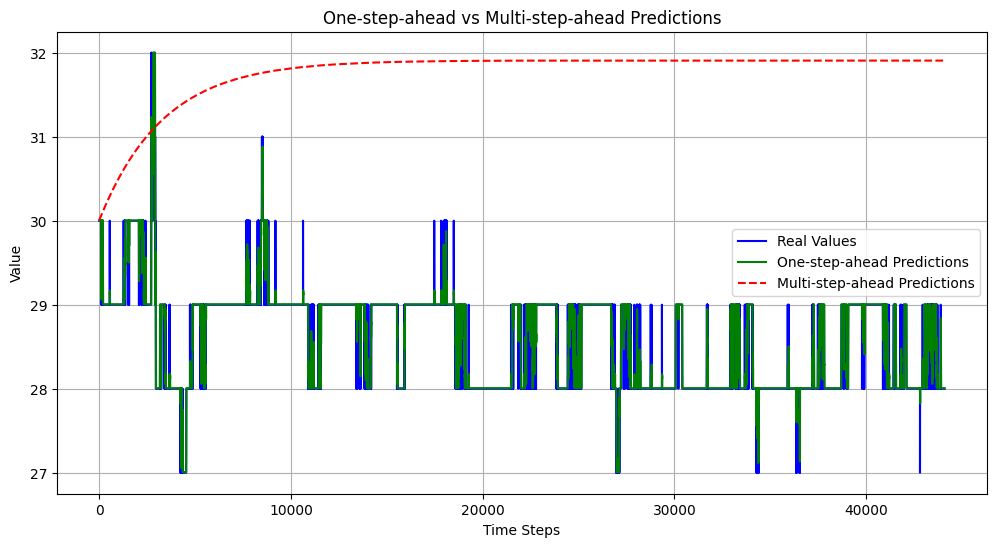

In [39]:
# Перемещение данных обратно на CPU для визуализации

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Real Values', color='blue')
plt.plot(test_outputs_one_step, label='One-step-ahead Predictions', color='green')
plt.plot(multi_step_predictions, label='Multi-step-ahead Predictions', color='red', linestyle='--')
plt.title('One-step-ahead vs Multi-step-ahead Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

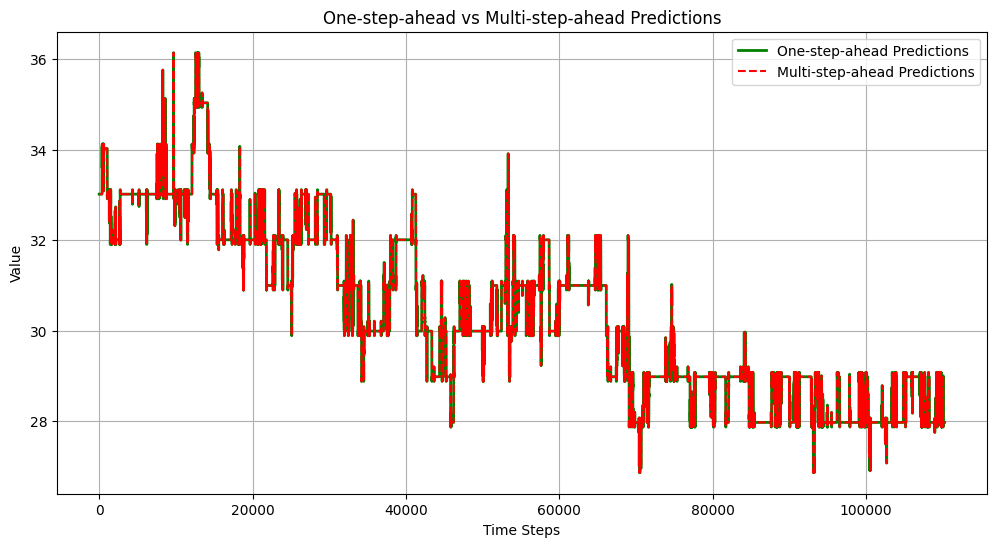

In [27]:
# Визуализация результатов
plt.figure(figsize=(12, 6))

plt.plot(test_outputs_one_step, label='One-step-ahead Predictions', color='green',  linewidth=2)
plt.plot(multi_step_predictions, label='Multi-step-ahead Predictions', color='red', linestyle='--')
plt.title('One-step-ahead vs Multi-step-ahead Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Преобразуем предсказанные и реальные значения в массивы NumPy
predicted_values_one_step = test_outputs_one_step.flatten()
predicted_values_multi_step = multi_step_predictions.flatten()
real_values = y_test.flatten()

# Разбиение на 50 бинов (интервалов)
num_bins = 50
bins = np.linspace(min(predicted_values_one_step), max(predicted_values_one_step), num_bins + 1)  # Границы бинов
bin_centers = (bins[:-1] + bins[1:]) / 2  # Середины бинов

# Вычисление процентного расхождения для one-step-ahead
percentage_rms_one_step = []

for i in range(num_bins):
    # Выбираем значения, попавшие в текущий бин
    mask = (predicted_values_one_step >= bins[i]) & (predicted_values_one_step < bins[i + 1])
    predicted_bin = predicted_values_one_step[mask]
    real_bin = real_values[mask]

    # Если в бине есть данные, вычисляем RMS и процентное расхождение
    if len(predicted_bin) > 0:
        rms = np.sqrt(np.mean((predicted_bin - real_bin) ** 2))  # RMS
        mean_real = np.mean(real_bin)  # Среднее реальное значение в бине
        percentage_rms_one_step.append((rms / mean_real) * 100)  # Процентное расхождение
    else:
        percentage_rms_one_step.append(np.nan)  # Если данных нет, добавляем NaN

# Вычисление процентного расхождения для multi-step-ahead
percentage_rms_multi_step = []

for i in range(num_bins):
    # Выбираем значения, попавшие в текущий бин
    mask = (predicted_values_multi_step >= bins[i]) & (predicted_values_multi_step < bins[i + 1])
    predicted_bin = predicted_values_multi_step[mask]
    real_bin = real_values[mask]

    # Если в бине есть данные, вычисляем RMS и процентное расхождение
    if len(predicted_bin) > 0:
        rms = np.sqrt(np.mean((predicted_bin - real_bin) ** 2))  # RMS
        mean_real = np.mean(real_bin)  # Среднее реальное значение в бине
        percentage_rms_multi_step.append((rms / mean_real) * 100)  # Процентное расхождение
    else:
        percentage_rms_multi_step.append(np.nan)  # Если данных нет, добавляем NaN

# Построение графика
plt.figure(figsize=(10, 6))



# Гистограмма для multi-step-ahead (пунктирная)
plt.bar(bin_centers, percentage_rms_multi_step, width=np.diff(bins)[0], align='center', color='red', alpha=0.7, edgecolor='black',  linewidth=2, label='Multi-step-ahead')

# Гистограмма для one-step-ahead
plt.bar(bin_centers, percentage_rms_one_step, width=np.diff(bins)[0], align='center', color='green', alpha=0.7, label='One-step-ahead')
# Настройка графика
plt.xlabel('Предсказанные значения (середина бина)')
plt.ylabel('Расхождение, % (RMS)')
plt.title('Процентное расхождение прогноза и реальных данных (50 бинов)')
plt.legend()
plt.grid(True)
plt.show()

def calculate_mape(real_values, predicted_values):
    # Убедимся, что реальные значения не равны нулю (чтобы избежать деления на ноль)
    mask = real_values != 0
    real_values = real_values[mask]
    predicted_values = predicted_values[mask]

    # Вычисляем MAPE
    mape = np.mean(np.abs((real_values - predicted_values) / real_values)) * 100
    return mape

# Вычисляем MAPE для one-step-ahead
mape_one_step = calculate_mape(real_values, predicted_values_one_step)
print(f"MAPE для one-step-ahead: {mape_one_step:.2f}%")

# Вычисляем MAPE для multi-step-ahead
mape_multi_step = calculate_mape(real_values, predicted_values_multi_step)
print(f"MAPE для multi-step-ahead: {mape_multi_step:.2f}%")

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Извлекаем значения из столбца 'value'
values = resampled_data3['value'].values

# Кодируем уникальные значения в целые числа
label_encoder = LabelEncoder()
data_encoded = label_encoder.fit_transform(values)

# Считаем количество уникальных классов
num_classes = len(label_encoder.classes_)
print(f"Количество уникальных классов: {num_classes}")

# Создаем последовательности из 10 значений и целевой класс (11-е значение)
seq_length = 10
X, y = [], []
for i in range(len(data_encoded) - seq_length):
    X.append(data_encoded[i:i + seq_length])
    y.append(data_encoded[i + seq_length])

X = np.array(X)
y = np.array(y)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразуем данные в тензоры PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Создаем DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Определяем модель LSTM для классификации
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Инициализация скрытого состояния и состояния ячейки
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Проход через LSTM
        out, _ = self.lstm(x.unsqueeze(-1), (h0, c0))  # Добавляем размерность для LSTM
        
        # Берем последний выход LSTM
        out = self.fc(out[:, -1, :])
        return out

# Параметры модели
input_size = 1  # Один признак (value)
hidden_size = 128  # Размер скрытого состояния
num_layers = 5  # Количество слоев LSTM

# Ини циализация модели
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)

# Перемещение модели на GPU, если доступно
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 2
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0  # Суммарные потери за эпоху
    for batch_X, batch_y in train_loader:
        # Перемещение данных на GPU
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Обнуление градиентов
        optimizer.zero_grad()

        # Прямой проход
        outputs = model(batch_X.unsqueeze(-1))  # Исправлено: добавляем размерность для LSTM
        loss = criterion(outputs, batch_y)

        # Обратный проход и оптимизация
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()  # Добавляем потери за батч

    # Вычисляем средние потери за эпоху
    epoch_loss /= len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f }')

# Оценка модели на тестовых данных
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs.unsqueeze(-1))  # Исправлено: добавляем размерность для LSTM
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

# Пример предсказания для one-step
def predict_one_step(input_sequence):
    input_tensor = torch.tensor(input_sequence, dtype=torch.float32).unsqueeze(0).to(device)
    loaded_model.eval()
    with torch.no_grad():
        output = loaded_model(input_tensor.unsqueeze(-1))
        _, predicted = torch.max(output.data, 1)
    return label_encoder.inverse_transform(predicted.cpu().numpy())

# Пример предсказания для multi-step
def predict_multi_step(input_sequence, steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(steps):
        input_tensor = torch.tensor(current_input, dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            output = loaded_model(input_tensor.unsqueeze(-1))
            _, predicted = torch.max(output.data, 1)
            predicted_class = predicted.cpu().numpy()[0]
            predictions.append(predicted_class)
            current_input = np.append(current_input[1:], predicted_class)  # Обновляем входные данные
    return label_encoder.inverse_transform(predictions)

# Пример использования функции предсказания
sample_sequence = data_encoded[-10:]  # Последние 10 значений для предсказания
predicted_class_one_step = predict_one_step(sample_sequence)
print(f'Предсказанный класс для one-step предсказания: {predicted_class_one_step}')

predicted_classes_multi_step = predict_multi_step(sample_sequence, steps=5)
print(f'Предсказанные классы для multi-step предсказания: {predicted_classes_multi_step}') 

Количество уникальных классов: 108


ValueError: LSTM: Expected input to be 2D or 3D, got 4D instead

In [44]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import math

# Конфигурация
SEED = 42
SEQ_LENGTH = 48    # Длина последовательности (например, 24 часа с шагом 30 минут)
HORIZON = 16        # Прогноз на 2 часа вперед
BATCH_SIZE = 64
EPOCHS = 1
TARGET_COL = 'value'  # Целевая переменная
FEATURES = []  # Временные признаки будут добавлены динамически

# Установка семени
torch.manual_seed(SEED)
np.random.seed(SEED)

def prepare_data(df):
    df = df.copy()
    df['time'] = pd.to_datetime(df['time'])
    
    # Извлечение временных признаков
    df['hour'] = df['time'].dt.hour
    df['minute'] = df['time'].dt.minute
    df['day_of_week'] = df['time'].dt.dayofweek
    df['day_of_month'] = df['time'].dt.day
    df['month'] = df['time'].dt.month
    df['week_of_year'] = df['time'].dt.isocalendar().week
    df['is_weekend'] = df['time'].dt.dayofweek >= 5
    df['time_of_day'] = pd.cut(df['hour'], 
                              bins=[0, 6, 12, 18, 24], 
                              labels=['night', 'morning', 'day', 'evening'])
    
    # Удаление ненужного столбца
    df = df.drop(columns=['type', 'time'])
    
    # Определение признаков
    categorical_features = ['time_of_day']
    numerical_features = ['hour', 'minute', 'day_of_week', 
                          'day_of_month', 'month', 'week_of_year', 'is_weekend']
    
    # Препроцессинг
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features)
        ],
        remainder='passthrough'
    )
    
    processed_data = preprocessor.fit_transform(df)
    feature_names = preprocessor.get_feature_names_out()
    
    return pd.DataFrame(processed_data, columns=feature_names), df[[TARGET_COL]]

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(1), :].unsqueeze(0)
        return x

class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=128, nhead=4, num_layers=2):
        super().__init__()
        self.d_model = d_model
        
        # Входное проецирование
        self.input_proj = nn.Linear(input_size, d_model)
        
        # Позиционное кодирование
        self.pos_encoder = PositionalEncoding(d_model)
        
        # Слои трансформера
        encoder_layers = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=512,
            dropout=0.1,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layers, num_layers)
        
        # Выходной слой: прогнозирует одно значение для каждого шага горизонта
        self.fc = nn.Sequential(
            nn.Linear(d_model, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)  # Исправлено на 1 выходной нейрон
        )

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        x = self.input_proj(x)
        x = self.pos_encoder(x)
        x = self.transformer(x)
        
        # Берем последние HORIZON шагов
        x = x[:, -HORIZON:, :]  # (batch_size, HORIZON, d_model)
        
        # Применяем выходной слой к каждому шагу
        x = self.fc(x)  # (batch_size, HORIZON, 1)
        return x.squeeze(-1)  # (batch_size, HORIZON)
def mean_absolute_percentage_error(y_true, y_pred):
    non_zero_indices = y_true != 0
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / 
                        (y_true[non_zero_indices] + 1e-10)) * 100)
def create_non_overlapping_sequences(X, y, seq_length, horizon):
    X_seq, y_seq = [], []
    n_samples = len(X) - seq_length - horizon + 1
    
    for i in range(n_samples):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length:i+seq_length+horizon].squeeze())
    
    return np.array(X_seq, dtype=np.float32), np.array(y_seq, dtype=np.float32)

def train_model(model, train_loader, val_loader, epochs):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    best_loss = float('inf')
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Валидация
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                val_loss += criterion(outputs, y_val).item()
        
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
        
        print(f'Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')
    
    return train_losses, val_losses

def plot_training_curve(train_loss, val_loss):
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Кривая обучения')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_predictions(y_true, y_pred, horizon):
    plt.figure(figsize=(18, 6 * (horizon + 1)))
    
    # Графики для каждого шага прогноза
    for step in range(horizon):
        plt.subplot(horizon + 1, 1, step + 1)
        y_true_step = y_true[:, step]
        y_pred_step = y_pred[:, step]
        
        plt.plot(y_true_step, label='Реальные значения', color='#2c7be5')
        plt.plot(y_pred_step, label='Прогноз', color='#ff7f0e', linestyle='--')
        plt.title(f'Шаг {step + 1} | MAPE: {mean_absolute_percentage_error(y_true_step, y_pred_step):.2f}%')
        plt.xlabel('Индекс')
        plt.ylabel('Температура (°C)')
        plt.grid(alpha=0.3)
        if step == 0: 
            plt.legend()
    
    # Усредненный график
    plt.subplot(horizon + 1, 1, horizon + 1)
    avg_true = np.mean(y_true, axis=1)
    avg_pred = np.mean(y_pred, axis=1)
    
    plt.plot(avg_true, label='Усредненные реальные значения', color='#2c7be5')
    plt.plot(avg_pred, label='Усредненный прогноз', color='#ff7f0e', linestyle='--')
    plt.title(f'Усредненные значения | MAPE: {mean_absolute_percentage_error(avg_true, avg_pred):.2f}%')
    plt.xlabel('Индекс')
    plt.ylabel('Температура (°C)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def main():
    # Загрузка данных
    data = resampled_data3
    
    # Подготовка данных
    X, y = prepare_data(data)
    
    train_size = int(0.7 * len(X))
    val_size = int(0.15 * len(X))
    
    # Масштабирование данных
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_train = scaler_x.fit_transform(X[:train_size])
    y_train = scaler_y.fit_transform(y[:train_size])
    
    X_val = scaler_x.transform(X[train_size:train_size+val_size])
    y_val = scaler_y.transform(y[train_size:train_size+val_size])
    
    X_test = scaler_x.transform(X[train_size+val_size:])
    y_test = scaler_y.transform(y[train_size+val_size:])
    
    # Создание последовательностей
    X_train_seq, y_train_seq = create_non_overlapping_sequences(X_train, y_train, SEQ_LENGTH, HORIZON)
    X_val_seq, y_val_seq = create_non_overlapping_sequences(X_val, y_val, SEQ_LENGTH, HORIZON)
    X_test_seq, y_test_seq = create_non_overlapping_sequences(X_test, y_test, SEQ_LENGTH, HORIZON)
    
    # DataLoader
    train_loader = DataLoader(
        TensorDataset(
            torch.FloatTensor(X_train_seq), 
            torch.FloatTensor(y_train_seq.squeeze())
        ), 
        batch_size=BATCH_SIZE, 
        shuffle=True
    )
    
    val_loader = DataLoader(
        TensorDataset(
            torch.FloatTensor(X_val_seq), 
            torch.FloatTensor(y_val_seq.squeeze())
        ), 
        batch_size=BATCH_SIZE
    )
    
    # Инициализация и обучение модели
    model = TransformerModel(
        input_size=X_train.shape[1],
        d_model=128,
        nhead=4,
        num_layers=2
    )
    
    print("\nНачало обучения...")
    train_loss, val_loss = train_model(model, train_loader, val_loader, EPOCHS)
    
    # Загрузка лучшей модели
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    
    # Прогнозирование на тестовых данных
    test_preds = []
    with torch.no_grad():
        for X_batch in DataLoader(TensorDataset(torch.FloatTensor(X_test_seq)), batch_size=BATCH_SIZE):
            outputs = model(X_batch[0].to(next(model.parameters()).device))
            test_preds.append(outputs.cpu().numpy())
    
    test_preds = np.concatenate(test_preds)
    
    # Обратное преобразование масштаба
    y_test_real = scaler_y.inverse_transform(y_test_seq.reshape(-1, HORIZON))
    test_preds = scaler_y.inverse_transform(test_preds.reshape(-1, HORIZON))
    
    # Визуализация прогнозов
    print("\nВизуализация результатов...")
    plot_predictions(y_test_real[9500:11000], test_preds[9500:11000], HORIZON)

if __name__ == "__main__":
    main()


Начало обучения...


D:\PyTorchEnv\.venv\Lib\site-packages\torch\nn\modules\loss.py:1102: UserWarning: Using a target size (torch.Size([64, 200])) that is different to the input size (torch.Size([64, 48])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)


RuntimeError: The size of tensor a (48) must match the size of tensor b (200) at non-singleton dimension 1

# REALITY

Created 19654 sequences with horizon 96
Created 911 sequences with horizon 96
Created 912 sequences with horizon 96

Начало обучения...
Epoch 1/1 | Train Loss: 0.0152 | Val Loss: 0.0028

Визуализация результатов...
Средний MAPE для всех шагов: 5.87%



Итоговые метрики на тестовых данных:
MAE: 1.162°C
RMSE: 1.279°C
MAPE: 4.133%

Визуализация кривой обучения...


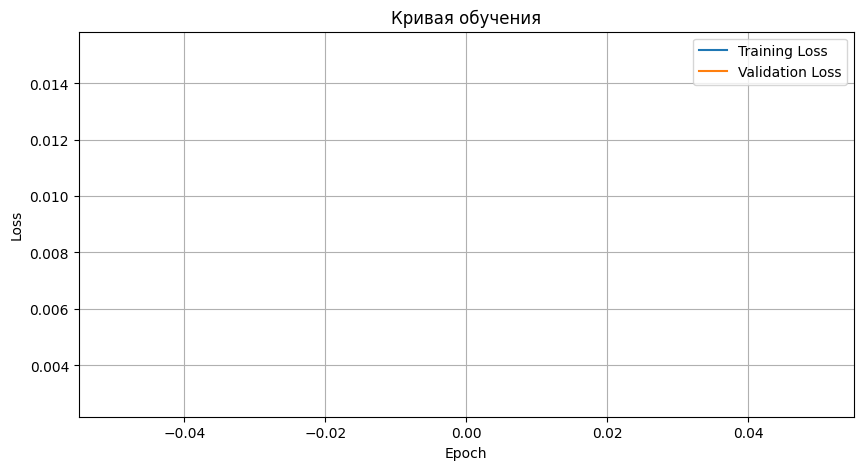

Индекс 276:
Фиолетовая линия: [28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 29. 28. 28. 29. 28. 29. 29. 29. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 29. 28. 28.
 28. 29. 29. 29. 28. 29. 28. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 28.
 29. 29. 29. 29. 28. 28.]
Оранжевая линия: [29.52673  29.4644   29.416792 29.487373 29.61148  29.654749 29.572891
 29.47673  29.529821 29.595512 29.629765 29.687815 29.815168 29.888811
 29.74844  29.719429 29.76386  29.741314 29.915426 29.805182 29.73717
 29.701809 29.676315 29.677961 29.89934  29.885193 29.799145 29.675644
 29.544085 29.552662 29.708769 29.718967 29.57858  29.618557 29.668304
 29.653881 29.665049 29.694187 29.615486 29.494305 29.559406 29.629807
 29.739502 29.725758 29.69779  29.663109 29.640068 29.63127  29.69004
 29.66542  29.63957  29.63256  29.566975 29.671707 29.765245 29.805

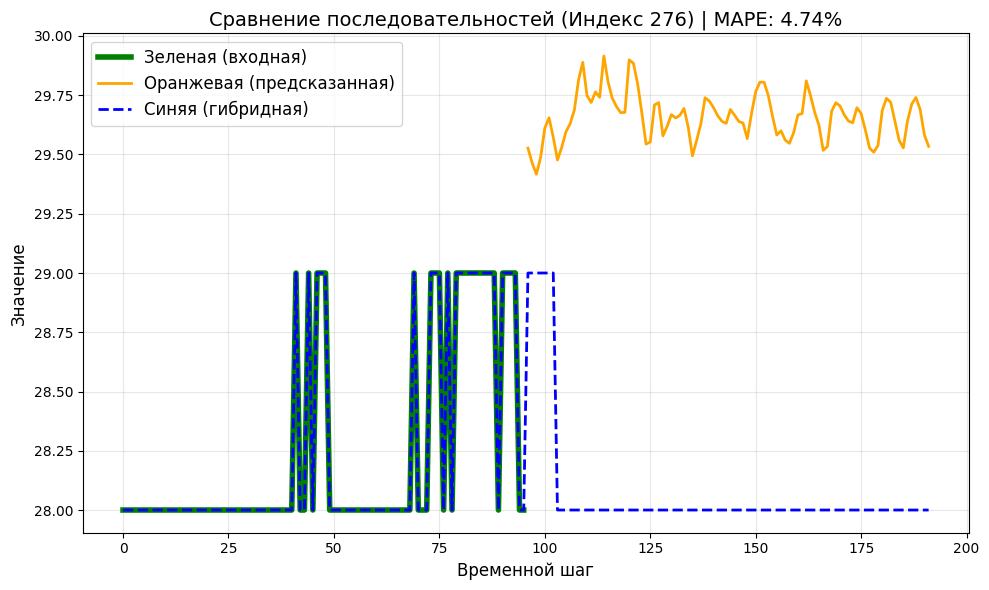

Индекс 91:
Фиолетовая линия: [28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28.]
Оранжевая линия: [29.570734 29.554302 29.52618  29.476479 29.538326 29.593456 29.550554
 29.547462 29.550293 29.57471  29.531372 29.78113  29.750866 29.757406
 29.699245 29.615982 29.625278 29.839804 29.759405 29.662594 29.602207
 29.552517 29.52238  29.709139 29.752151 29.770142 29.720978 29.607243
 29.455347 29.4765   29.538063 29.550049 29.441528 29.526585 29.514017
 29.692984 29.688717 29.73776  29.504505 29.368614 29.434984 29.629528
 29.66576  29.658749 29.625267 29.593037 29.59526  29.707792 29.735912
 29.704597 29.64442  29.611132 29.57735  29.673153 29.727571 29.75

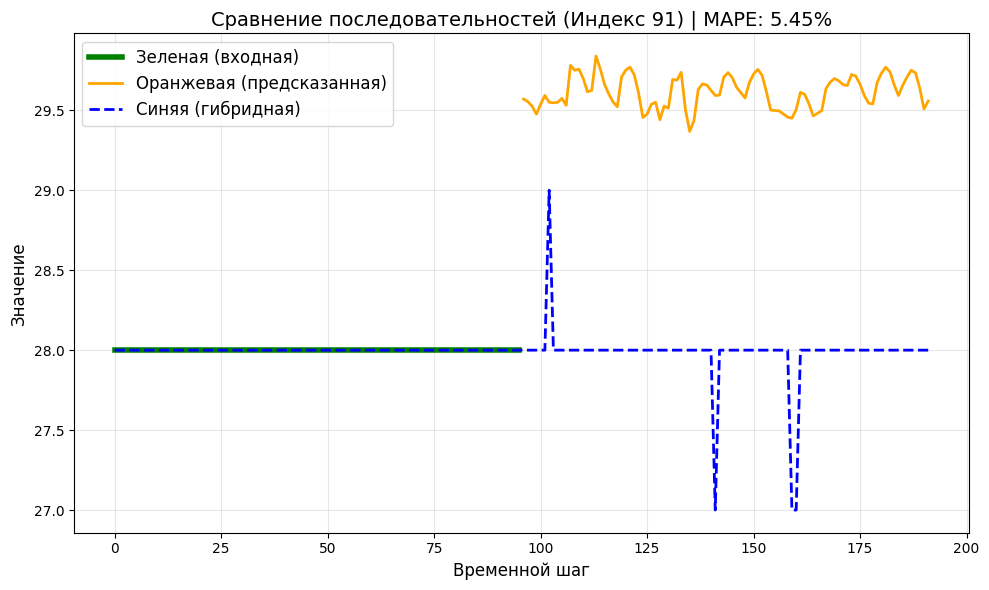

Индекс 597:
Фиолетовая линия: [29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29.
 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29.
 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29.
 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29.
 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29.
 29. 29. 29. 29. 29. 29.]
Оранжевая линия: [29.467571 29.407627 29.453968 29.642351 29.70369  29.718416 29.657572
 29.549692 29.473078 29.571938 29.624332 29.705153 29.723415 29.651222
 29.550592 29.55308  29.589937 29.585848 29.511864 29.43101  29.420086
 29.577965 29.5775   29.578829 29.600151 29.615276 29.582314 29.652727
 29.554909 29.52133  29.701376 29.702213 29.539148 29.70015  29.728868
 29.730852 29.66512  29.686176 29.593287 29.544338 29.631752 29.707928
 29.738932 29.74142  29.714249 29.745844 29.712818 29.719788 29.721321
 29.68405  29.626095 29.702719 29.662323 29.660435 29.69032  29.7

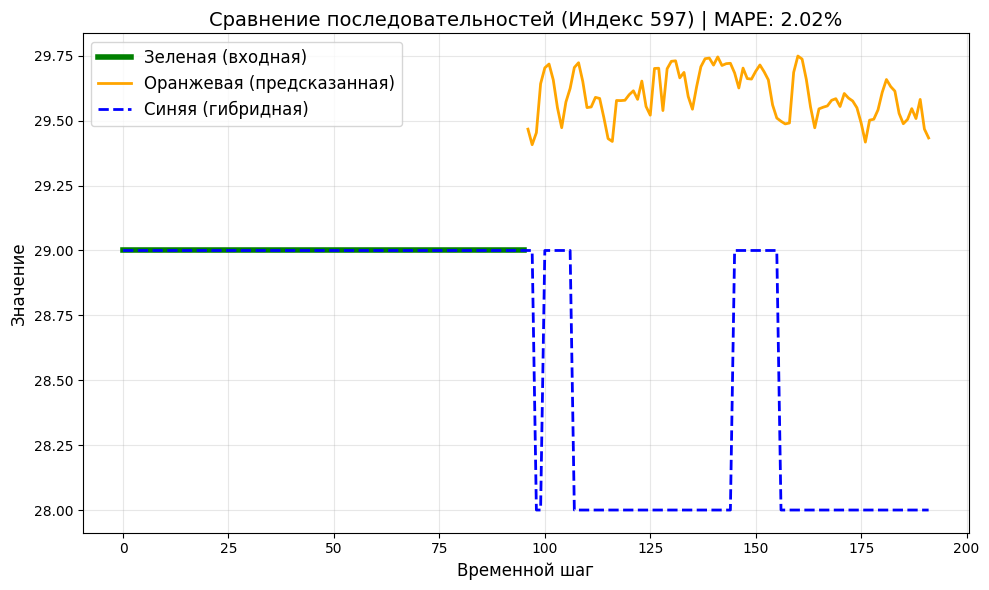

Индекс 651:
Фиолетовая линия: [29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29.
 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29.
 29. 29. 29. 29. 29. 29. 29. 29. 28. 28. 29. 29. 29. 29. 29. 29. 29. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 29. 29. 29. 29. 29.]
Оранжевая линия: [29.397078 29.34345  29.286383 29.386036 29.507267 29.544117 29.47469
 29.362925 29.371136 29.508022 29.52428  29.51803  29.573792 29.56648
 29.476124 29.620796 29.666834 29.659374 29.582008 29.493324 29.428408
 29.587679 29.532307 29.48287  29.508034 29.525938 29.493439 29.581278
 29.468882 29.358978 29.477707 29.47201  29.293974 29.561842 29.592325
 29.579523 29.49443  29.52038  29.452143 29.407234 29.504814 29.571377
 29.584063 29.577679 29.557575 29.601437 29.579237 29.58406  29.567398
 29.506668 29.434124 29.698198 29.640905 29.580296 29.61726  29.634

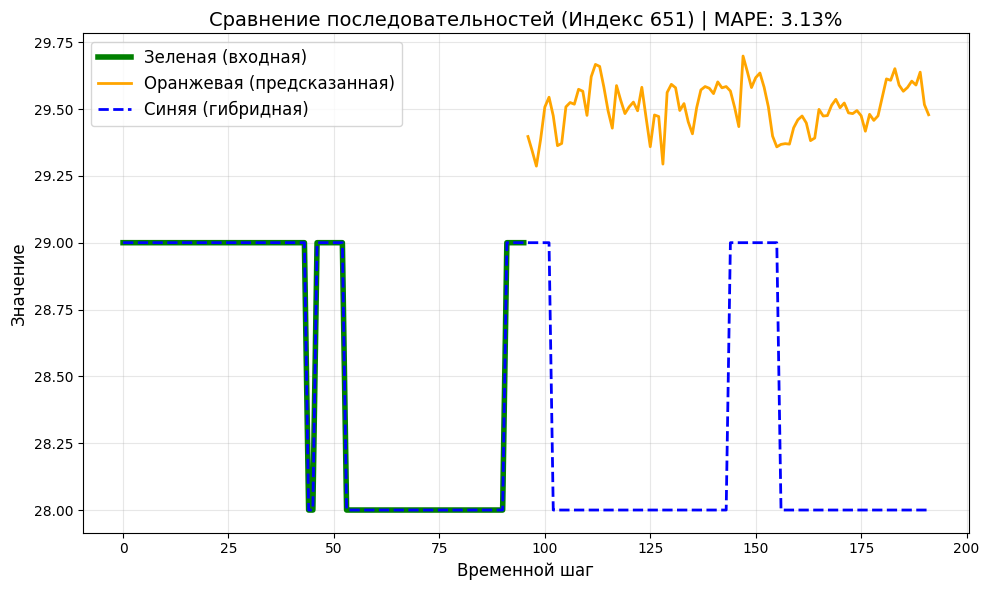

Индекс 221:
Фиолетовая линия: [28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 27. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 27. 27. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28. 28.
 28. 28. 28. 28. 28. 28.]
Оранжевая линия: [29.484224 29.477427 29.45774  29.438408 29.527565 29.565498 29.51071
 29.428759 29.498262 29.544916 29.545145 29.571459 29.635515 29.782452
 29.729517 29.665956 29.688828 29.6501   29.554167 29.717733 29.656647
 29.611546 29.577728 29.563862 29.578438 29.816343 29.76352  29.647358
 29.49586  29.334972 29.46167  29.496672 29.477406 29.562445 29.622932
 29.614344 29.512644 29.49868  29.381653 29.38855  29.477175 29.531624
 29.527056 29.618855 29.591347 29.562988 29.54958  29.546043 29.516575
 29.740522 29.688057 29.660408 29.620625 29.640673 29.677292 29.76

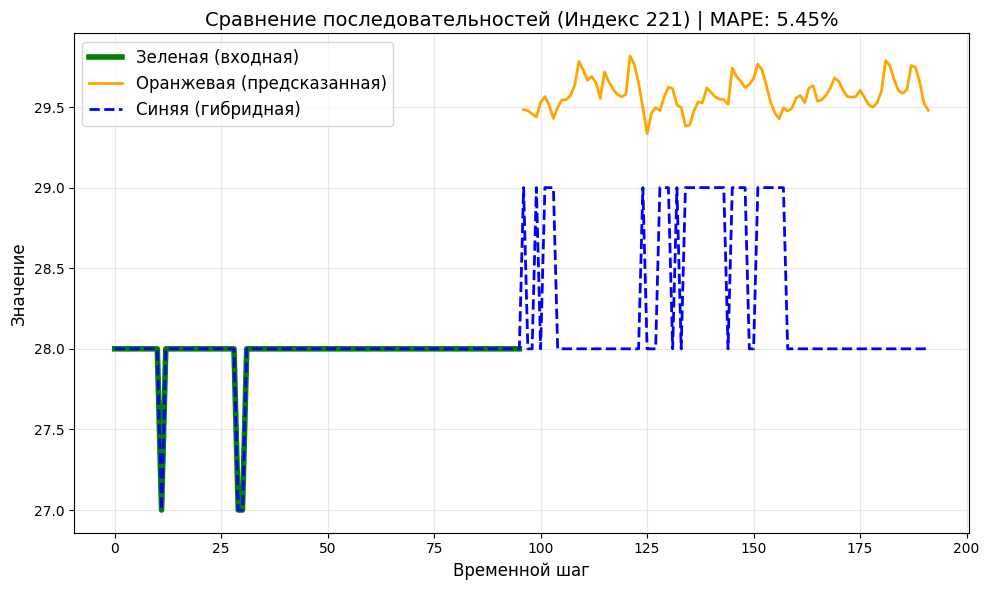

In [16]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import math

# Конфигурация
SEED = 43
SEQ_LENGTH = 96     # Длина последовательности (например, 48 * 30 минут)
HORIZON = 96      # Прогноз на 2 часа вперед
BATCH_SIZE = 64
EPOCHS = 1
TARGET_COL = 'value'  # Целевая колонка
FEATURES = []  # Здесь будут временные признаки

# Установка семени
torch.manual_seed(SEED)
np.random.seed(SEED)

def prepare_data(df):
    df = df.copy()
    df['time'] = pd.to_datetime(df['time'])
    
    # Извлечение временных признаков
    df['hour'] = df['time'].dt.hour
    df['minute'] = df['time'].dt.minute
    df['day_of_week'] = df['time'].dt.dayofweek
    df['day_of_month'] = df['time'].dt.day
    df['month'] = df['time'].dt.month
    df['week_of_year'] = df['time'].dt.isocalendar().week
    df['is_weekend'] = df['time'].dt.dayofweek >= 5
    df['time_of_day'] = pd.cut(df['hour'], 
                              bins=[0, 6, 12, 18, 24], 
                              labels=['night', 'morning', 'day', 'evening'])
    
    # Удаление исходного столбца с временем
    df = df.drop(columns=['time', 'type'])  # Удаляем колонку 'type'
    
    # Определение признаков
    categorical_features = ['time_of_day']
    numerical_features = ['hour', 'minute', 'day_of_week', 
                          'day_of_month', 'month', 'week_of_year', 'is_weekend']
    
    # Препроцессинг
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features)
        ],
        remainder='passthrough'
    )
    
    processed_data = preprocessor.fit_transform(df)
    feature_names = preprocessor.get_feature_names_out()
    
    return pd.DataFrame(processed_data, columns=feature_names), df[[TARGET_COL]], df.index.to_series()

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(1), :].unsqueeze(0)
        return x

class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=1024, nhead=4, num_layers=2):
        super().__init__()
        self.d_model = d_model
        
        # Входное проецирование
        self.input_proj = nn.Linear(input_size, d_model)
        
        # Позиционное кодирование
        self.pos_encoder = PositionalEncoding(d_model)
        
        # Слои трансформера
        encoder_layers = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=1024,
            dropout=0.1,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layers, num_layers)
        
        # Выходной слой: прогнозирует одно значение для каждого шага горизонта
        self.fc = nn.Sequential(
            nn.Linear(d_model, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1) )

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        x = self.input_proj(x)
        x = self.pos_encoder(x)
        x = self.transformer(x)
        
        # Берем последние HORIZON шагов
        x = x[:, -HORIZON:, :]  # (batch_size, HORIZON, d_model)
        
        # Применяем выходной слой к каждому шагу
        x = self.fc(x)  # (batch_size, HORIZON, 1)
        return x.squeeze(-1)  # (batch_size, HORIZON)

def create_non_overlapping_sequences(X, y, seq_length, horizon):
    X_seq, y_seq = [], []
    n_samples = len(X) - seq_length - horizon + 1
    
    for i in range(n_samples):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length:i+seq_length+horizon].squeeze())
    
    print(f"Created {len(X_seq)} sequences with horizon {horizon}")
    return np.array(X_seq), np.array(y_seq)

def train_model(model, train_loader, val_loader, epochs):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001, 
                                           steps_per_epoch=len(train_loader), 
                                           epochs=epochs)
    
    best_loss = float('inf')
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            train_loss += loss.item()
        
        # Валидация
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                val_loss += criterion(outputs, y_val).item()
        
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
        
        print(f'Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')
    
    return train_losses, val_losses

def plot_training_curve(train_loss, val_loss):
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Кривая обучения')
    plt.legend()
    plt.grid(True)
    plt.show()

def mean_absolute_percentage_error(y_true, y_pred):
    non_zero_indices = y_true != 0
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / 
                        (y_true[non_zero_indices] + 1e-10)) * 100)

def plot_predictions(y_true, y_pred, horizon):
    plt.figure(figsize=(18, 6 * horizon))
    
    mape_values = []  # Для хранения MAPE каждого шага
    
    for step in range(horizon):
        plt.subplot(horizon, 1, step + 1)
        y_true_step = y_true[:, step]
        y_pred_step = y_pred[:, step]
        
        mape = mean_absolute_percentage_error(y_true_step, y_pred_step)
        mape_values.append(mape)
        
        plt.plot(y_true_step, label='Реальные значения', color='#2c7be5')
        plt.plot(y_pred_step, label='Прогноз', color='#ff7f0e', linestyle='--')
        plt.title(f'Шаг {step + 1} | MAPE: {mape:.2f}%')
        plt.xlabel('Индекс')
        plt.ylabel('Температура (°C)')
        plt.grid(alpha=0.3)
        if step == 0: 
            plt.legend()
    
    avg_mape = np.mean(mape_values)
    print(f'Средний MAPE для всех шагов: {avg_mape:.2f}%')
    
    plt.tight_layout()
    plt.show()

def random_plot(y_true, y_pred, horizon, num_plots=5):
    """
    Строит num_plots случайных графиков.
    
    Параметры:
        y_true (np.array): Реальные значения (n_samples, horizon).
        y_pred (np.array): Прогнозы (n_samples, horizon).
        horizon (int): Горизонт прогнозирования.
        num_plots (int): Количество случайных графиков.
    """
    
    n_samples = y_true.shape[0]
    
    # Выбираем num_plots случайных индексов
    random_indices = np.random.choice(n_samples, num_plots, replace=False)
    
    for idx in random_indices:
        # Фиолетовая линия (исходная последовательность)
        purple_line = y_true[idx]
        
        # Оранжевая линия (предсказанная последовательность)
        orange_line = y_pred[idx]
        
        # Синяя линия (гибридная последовательность)
        # Начинаем с фиолетовой линии
        blue_line = list(purple_line)
        
        # Добавляем последние элементы из следующих строк y_true
        # Останавливаемся, когда синяя линия достигает длины фиолетовой + оранжевой
        max_length = len(purple_line) + len(orange_line)
        current_length = len(purple_line)
        
        i = idx + 1
        while current_length < max_length and i < len(y_true):
            blue_line.append(y_true[i][-1])  # Берем последний элемент каждой следующей строки
            current_length += 1
            i += 1
        
        # Рассчитываем MAPE
        mape = mean_absolute_percentage_error(orange_line, y_true[idx])
        
        # Отладочная информация
        print(f"Индекс {idx}:")
        print(f"Фиолетовая линия: {purple_line}")
        print(f"Оранжевая линия: {orange_line}")
        print(f"Синяя линия: {blue_line}")
        print(f"Длина синей линии: {len(blue_line)} (ожидалось {max_length})")
        print(f"MAPE: {mape:.2f}%")
        print("-" * 40)
        
        # Визуализация
        plt.figure(figsize=(10, 6))
        
        # Фиолетовая линия
        plt.plot(range(len(purple_line)), purple_line, 
                 label='Зеленая (входная)', 
                 color='green', 
                 linewidth=4)
        
        # Оранжевая линия
        plt.plot(range(len(purple_line), len(purple_line) + len(orange_line)), orange_line, 
                 label='Оранжевая (предсказанная)', 
                 color='orange', 
                 linewidth=2)
        
        # Синяя линия
        plt.plot(range(len(blue_line)), blue_line, 
                 label='Синяя (гибридная)', 
                 color='blue', 
                 linestyle='--', 
                 linewidth=2)
        
        # Настройки графика
        plt.title(f'Сравнение последовательностей (Индекс {idx}) | MAPE: {mape:.2f}%', fontsize=14)
        plt.xlabel('Временной шаг', fontsize=12)
        plt.ylabel('Значение', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    
def main():
    # Загрузка данных
    df = resampled_data3[::10]  # Используем ваш датасет
    
    # Подготовка данных
    X, y, _ = prepare_data(df)
    
    train_size = int(0.9 * len(X))
    val_size = int(0.05 * len(X))
    
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_train = scaler_x.fit_transform(X[:train_size])
    y_train = scaler_y.fit_transform(y[:train_size])
    
    X_val = scaler_x.transform(X[train_size:train_size + val_size])
    y_val = scaler_y.transform(y[train_size:train_size + val_size])
    
    X_test = scaler_x.transform(X[train_size + val_size:])
    y_test = scaler_y.transform(y[train_size + val_size:])
    
    # Создание последовательностей для всех наборов
    X_train_seq, y_train_seq = create_non_overlapping_sequences(
        X_train, y_train, SEQ_LENGTH, HORIZON
    )
    X_val_seq, y_val_seq = create_non_overlapping_sequences(
        X_val, y_val, SEQ_LENGTH, HORIZON
    )
    X_test_seq, y_test_seq = create_non_overlapping_sequences(
        X_test, y_test, SEQ_LENGTH, HORIZON
    )
    
    # DataLoader
    train_loader = DataLoader(
        TensorDataset(
            torch.FloatTensor(X_train_seq), 
            torch.FloatTensor(y_train_seq.squeeze())
        ), 
        batch_size=BATCH_SIZE, 
        shuffle=True
    )
    
    val_loader = DataLoader(
        TensorDataset(
            torch.FloatTensor(X_val_seq), 
            torch.FloatTensor(y_val_seq.squeeze())
        ), 
        batch_size=BATCH_SIZE
    )
    
    test_loader = DataLoader(
        TensorDataset(
            torch.FloatTensor(X_test_seq), 
            torch.FloatTensor(y_test_seq.squeeze())
        ), 
        batch_size=BATCH_SIZE
    )
    
    # Инициализация и обучение модели
    model = TransformerModel(
        input_size=X_train.shape[1],
        d_model=128,    # Размерность эмбеддингов
        nhead=4,        # Количество голов внимания
        num_layers=2    # Количество слоев трансформера
    )
    
    print("\nНачало обучения...")
    train_loss, val_loss = train_model(model, train_loader, val_loader, EPOCHS)
    
    # Загрузка лучшей модели
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    
    # Прогнозирование на тестовых данных
    test_preds = []
    with torch.no_grad():
        for X_batch, _ in test_loader:
            outputs = model(X_batch.to(next(model.parameters()).device))
            test_preds.append(outputs.cpu().numpy())
    
    test_preds = np.concatenate(test_preds)
    
    # Обратное преобразование масштаба
    y_test_real = scaler_y.inverse_transform(y_test_seq.reshape(-1, HORIZON))
    test_preds = scaler_y.inverse_transform(test_preds.reshape(-1, HORIZON))
    
    # Визуализация прогнозов
    print("\nВизуализация результатов...")
    plot_predictions(y_test_real[100:250], test_preds[100:250], HORIZON)
    
    # Расчет и вывод метрик
    y_true_all = y_test_real.flatten()
    y_pred_all = test_preds.flatten()
    
    print("\nИтоговые метрики на тестовых данных:")
    print(f"MAE: {mean_absolute_error(y_true_all, y_pred_all):.3f}°C")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true_all, y_pred_all)):.3f}°C")
    print(f"MAPE: {mean_absolute_percentage_error(y_true_all, y_pred_all):.3f}%")
    
    # Кривая обучения
    print("\nВизуализация кривой обучения...")
    plot_training_curve(train_loss, val_loss)
    random_plot(y_test_real, test_preds, HORIZON )
if __name__ == "__main__":
    main()